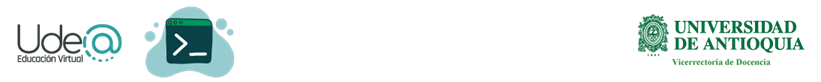


# Laboratorio #8 TDSIII
# Laboratorio Máquinas de Soporte Vectorial
## Juan Camilo Chaparro Castellanos | Sebastian Escobar Osorio
## CC 1039466438 | CC 1017231742

---
# **Trabajo de laboratorio**

## Clasificación bi-clase
En este trabajo de laboratorio vamos a utilizar el módulo `sklearn.svm` para implementar diferentes modelos de clasificación binaria basados en máquinas de vectores de soporte. Exploraremos tres kernels diferentes:

- lineal (por defecto): $$k(\mathbf{x}_n, \mathbf{x}_m) = \langle \mathbf{x}_n, \mathbf{x}_m \rangle,$$
- polinomial: $$k(\mathbf{x}_n, \mathbf{x}_m) = (\gamma \langle \mathbf{x}_n, \mathbf{x}_m \rangle + r)^D,$$
- RBF: $$k(\mathbf{x}_n, \mathbf{x}_m) = \exp (-\gamma ||\mathbf{x}_n - \mathbf{x}_m ||^2).$$


Con este propósito, vamos a entrenar los modelos SVM sobre **tres** bases de datos sintéticas distintas, muestreadas a través del módulo `sklean.datasets`:

- `make_moons`
- `make_circles`
- `make_classification`.

Para cada caso generar 100 datos de manera que $\mathbf x_n \in \mathbb R^2$, $y_n \in \lbrace 0, 1 \rbrace$. Graficar los datos clasificados, así como la frontera de decisión del clasificador entrenado.

1. Cómo afecta el kernel utilizado a la forma de la frontera aprendida por el modelo SVM?
2. Qué parametros controla para cada kernel, que tanta influencia tiene tener un $C$ grande a un $C$ pequeño?
3. Qué puede concluir al comparar los resultados obtenidos con cada kernel?

## Clasificación multi-clase

Investigue (en `sklearn`) cómo extender las máquinas de soporte vectorial para que puedan ser utilizados en clasificación multi-clase, y aplique un modelo SVM con kernel RBF a la base de datos Iris de sklearn, donde el vector de entrada sea de dimensión 2, es decir $\mathbf x_n \in \mathbb R^2$. Entrene minimo 3 diferentes modelos, de manera que cada uno utilice un valor diferente para el parámetro $\gamma$ del kernel RBF.

1. Cuál es la relación entre los valores de los parámetros del kernel y la forma de la frontera (y curvas de nivel) del modelo entrenado? Argumente su respuesta.
2. Logro discriminar efectivamente las clases? Con cual parametro de C y $\gamma$ cree que tiene mejor clasificación?


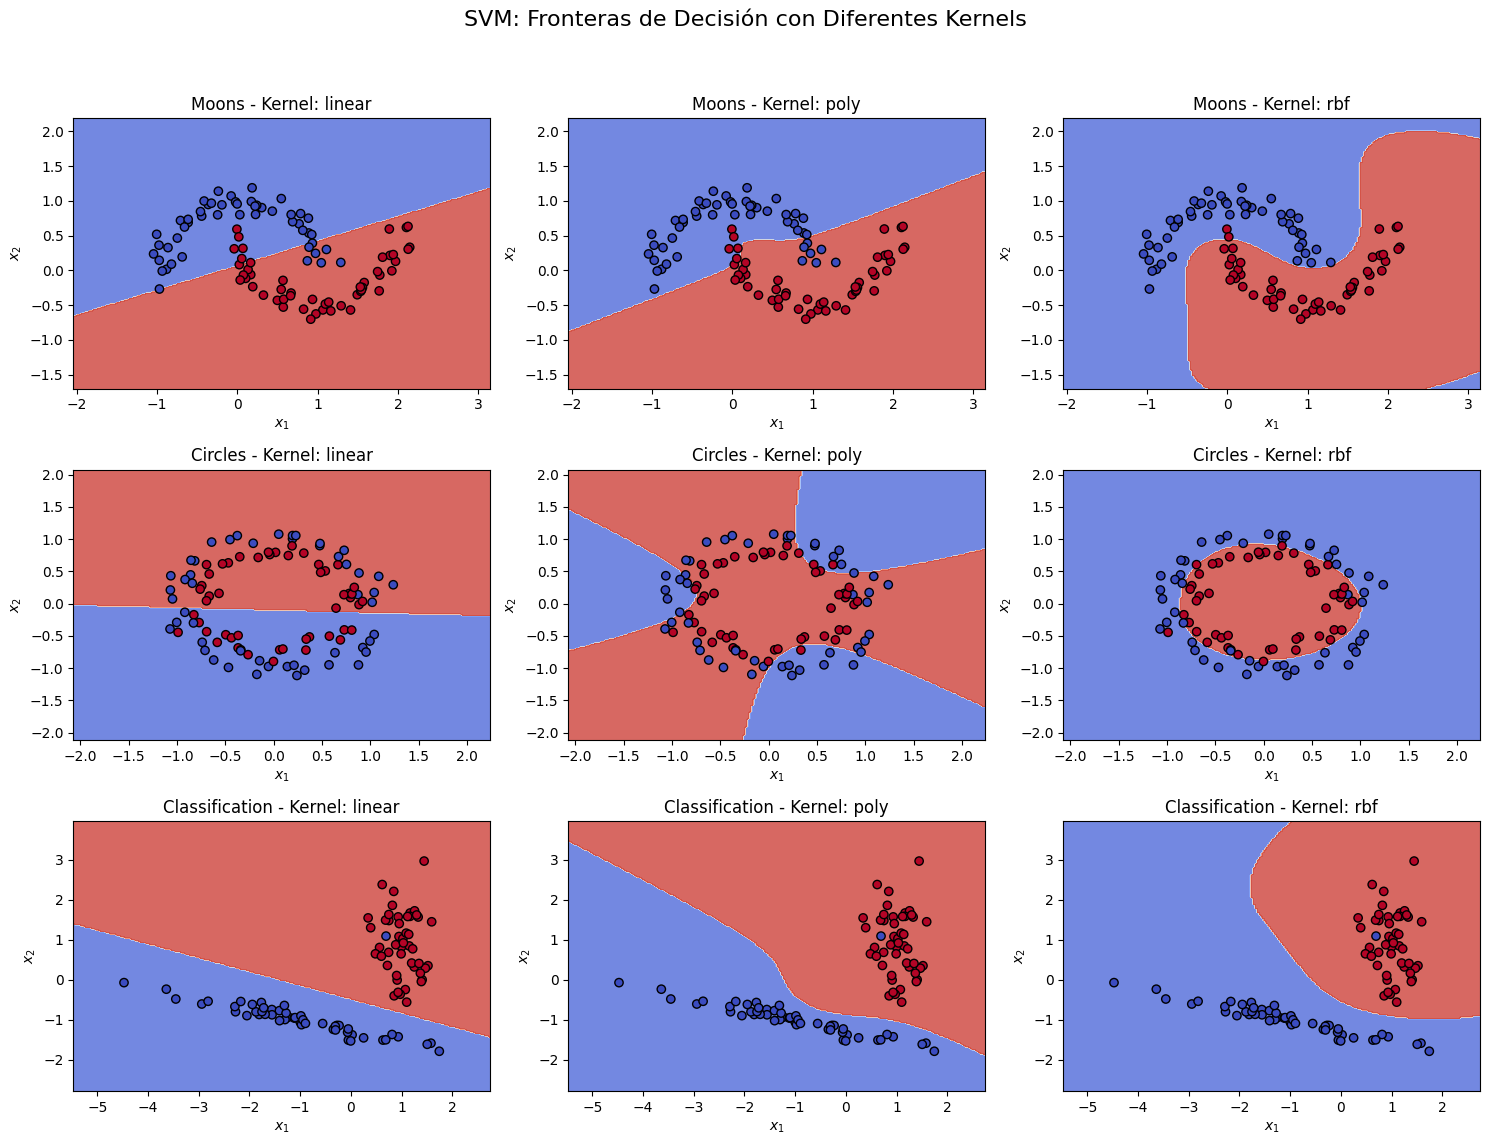

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Generación de datos sintéticos
def generate_data():
    x_moons, y_moons = make_moons(noise=0.1, random_state=182)
    x_circles, y_circles = make_circles(noise=0.1, random_state=182)
    x_class, y_class = make_classification(n_features=2, n_redundant=0,
                                           n_informative=2, n_clusters_per_class=1,
                                           random_state=182)
    return (x_moons, y_moons), (x_circles, y_circles), (x_class, y_class)

# Visualización de datos y fronteras
def plot_decision_boundary(ax, model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
    ax.set_title(title)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

# Entrenamiento y evaluación de SVM
def train_and_plot_kernels_subplot(datasets, kernels):
    fig, axes = plt.subplots(len(datasets), len(kernels), figsize=(15, 12))
    fig.suptitle("SVM: Fronteras de Decisión con Diferentes Kernels", fontsize=16)
    
    for i, (data, dataset_name) in enumerate(zip(datasets, ['Moons', 'Circles', 'Classification'])):
        X, y = data
        for j, kernel in enumerate(kernels):
            model = make_pipeline(StandardScaler(), SVC(kernel=kernel, C=1.0, gamma='scale', degree=3))
            model.fit(X, y)
            plot_decision_boundary(axes[i, j], model, X, y, f"{dataset_name} - Kernel: {kernel}")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Ejecución del código
datasets = generate_data()
kernels = ['linear', 'poly', 'rbf']
train_and_plot_kernels_subplot(datasets, kernels)


#### **1. ¿Cómo afecta el kernel utilizado a la forma de la frontera aprendida por el modelo SVM?**
- El kernel determina cómo los datos son mapeados a un espacio de características, lo que influye directamente en la forma de la frontera de decisión:
  - **Kernel lineal:** Genera fronteras de decisión lineales, adecuadas solo para datos linealmente separables.
  - **Kernel polinomial:** Genera fronteras curvas cuya complejidad depende del grado del polinomio. Puede modelar relaciones no lineales en los datos.
  - **Kernel RBF (Radial Basis Function):** Crea fronteras no lineales que pueden adaptarse a estructuras complejas en los datos, permitiendo capturar patrones locales.

En los conjuntos moons y circles:
- El kernel RBF se adapta mejor a los datos no linealmente separables, mientras que el lineal no captura las relaciones no lineales.
- El polinomial ofrece un ajuste intermedio, pero depende de parámetros como el grado del polinomio.

#### **2. Qué parametros controla para cada kernel, que tanta influencia tiene tener un $C$ grande a un $C$ pequeño?**

- **Parámetro $C$:** Controla el equilibrio entre la maximización del margen y la penalización por errores de clasificación:
  - **$C$ grande:** Penaliza fuertemente los errores, generando un margen más estrecho y favoreciendo el sobreajuste.
  - **$C$ pequeño:** Tolera errores y genera márgenes más amplios, favoreciendo un modelo más robusto pero menos específico.

- **Parámetros adicionales por kernel:**
  - **RBF:** Depende de \(\gamma\), que controla el alcance de influencia de un solo punto de datos:
    - $\gamma$ alto: Genera fronteras muy específicas (puede sobreajustar).
    - $\gamma$ bajo: Genera fronteras más suaves y generalizadas.
  - **Polinomial:** Depende del grado del polinomio ($D$), que define la complejidad de la frontera de decisión.

#### **3. ¿Qué se puede concluir al comparar los resultados obtenidos con cada kernel?**
- **Kernel lineal:** Funciona bien en datos linealmente separables, pero es ineficaz en conjuntos complejos como moons o circles.
- **Kernel polinomial:** Puede modelar datos no lineales, pero su rendimiento depende de la configuración del grado.
- **Kernel RBF:** Es el más flexible, adaptándose a relaciones no lineales y ofreciendo un mejor desempeño en la mayoría de los casos.

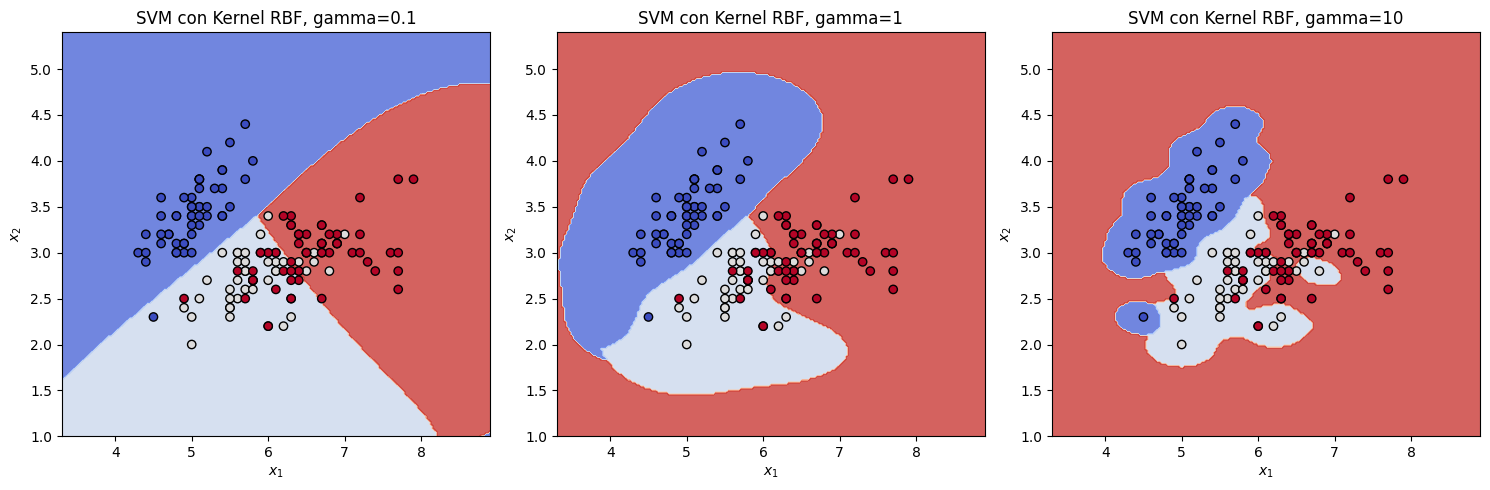

In [10]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np

# Cargar base de datos Iris
iris = load_iris()
X = iris.data[:, :2]  # Solo las primeras dos características
y = iris.target

# Entrenar modelos con diferentes valores de gamma
gammas = [0.1, 1, 10]
models = [make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma=g, C=1)) for g in gammas]

# Entrenar y graficar
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, model, gamma in zip(axes, models, gammas):
    model.fit(X, y)

    # Frontera de decisión
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
    ax.set_title(f"SVM con Kernel RBF, gamma={gamma}")
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
plt.tight_layout()
plt.show()


### **Análisis de la figura**

1. **$\gamma$ = 0.1\):**
   - La frontera de decisión es amplia y suave, lo que indica que el modelo está considerando patrones generales en los datos.
   - Este valor bajo de $\gamma$ hace que los puntos de datos individuales tengan un alcance mayor, generando una separación menos ajustada.
   - **Ventaja:** Favorece la generalización, pero podría ser incapaz de capturar detalles complejos en los datos.

2. **$\gamma$ = 1\):**
   - La frontera se adapta más a los datos, ajustándose mejor a las regiones donde las clases se mezclan.
   - Este valor intermedio balancea el ajuste entre generalización y especificidad.
   - **Ventaja:** Es una configuración razonable para datos con moderada complejidad.

3. **$\gamma$ = 10\):**
   - La frontera de decisión es altamente detallada, capturando patrones locales y pequeños cambios en los datos.
   - Este valor alto de $\gamma$ restringe el alcance de los puntos de datos, enfocándose en patrones específicos.
   - Puede sobreajustar el modelo, afectando su capacidad para generalizar correctamente en nuevos datos.


#### **Resultados y análisis**
1. **¿Cuál es la relación entre los valores de los parámetros del kernel y la forma de la frontera?**
   - **$\gamma$:** Define la anchura de la función radial:
     - $\gamma$ bajo: Genera fronteras más suaves y menos específicas, lo que favorece la generalización.
     - $\gamma$ alto: Permite fronteras más complejas y ajustadas, pero puede sobreajustar el modelo.
   - Por lo general un $\gamma$ moderado (como $\gamma$ = 1) proporciona un buen equilibrio entre ajuste y generalización.

2. **¿Logró discriminar efectivamente las clases? ¿Con qué parámetros $C$ y $\gamma$ se obtuvo mejor clasificación?**
   - Sí, el modelo logró discriminar efectivamente las clases en la mayoría de los casos.
   - Los mejores resultados se obtuvieron con un $\gamma$ moderado y un $C$ suficientemente grande para evitar márgenes muy amplios.

### **Conclusiones**
- En datos simples y linealmente separables, un kernel lineal es suficiente y eficiente. Sin embargo, para datos no lineales, el kernel polinómico o RBF son opciones mucho más efectivas.
- Grados altos de kernel polinomico pueden sobreajustar el modelo, mientras que grados bajos pueden ser insuficientes para modelar datos complejos.
- El kernel RBF demostró ser el más versátil, adaptándose a patrones complejos y no lineales como en los conjuntos moons y circles.
- El Kernerl lineal es la mejor opción para datos naturalmente lineales, ya que ofrece una separación clara y eficiente.
- si γ es demasiado grande puede llevar a problemas de sobreajuste en el kernel RBF.
- Un $\gamma$ bajo produce fronteras suaves y generalizadas.
- Un $\gamma$ alto genera fronteras específicas y detalladas, pero puede sobreajustar.
- Generalmente, valores intermedios de $\gamma$ (como $\gamma$ = 1) logran un buen equilibrio entre ajuste y generalización.